<a href="https://www.kaggle.com/code/irfanyulianaputra/bellabeat-case-study?scriptVersionId=180827734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

This documentation is done as part of the final project in the curriculum given in the Google Data Analyst course program. This case study will focus on analyzing the Bellabeat product, where in this scenario I am a junior data analyst working for a high-tech company specializing in women's health. There are 6 steps of analysis that will be performed: Ask, Prepare, Process, Analyze, Share, and Act. The six steps are carried out to get the desired data (clean data) and draw conclusions from the analysis performed.

**Background**

A smart device, also known as a connected device, is an electronic gadget that can communicate with other devices or networks to share and exchange data (such as Bluetooth, Zigbee, near field communication, Wi-Fi, NearLink, Li-Fi, or 5G). These devices are often equipped with sensors, internet connectivity, and software that allow them to collect and analyze data and perform automated or semi-automated tasks where user participation is still required to run the device.

Bellabeat is a high-tech manufacturer founded by Urška Sršen and Sando Mur that focuses on women's health. Since its founding in 2013, they have created various smart devices dedicated to women and one of them is a smart device that provides health data to users based on patterns performed by users in daily activities. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Seeing this, Sršen realized that an analysis of Bellabeat's available consumer data would show more opportunities for growth. He therefore wanted to analyze the user data in order to gain insight into how people are already using their smart devices.
* My Role: My role in this scenario is as a junior data analyst in the Bellabeat marketing analytics team.


# **1st Steps: ASK**

**Key Stakeholder**

* Urška Sršen Bellabeat cofounder and Chief Creative Officer
* Sando Mur Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

**Business Task**

* Identify and analyzing data from product users to gain insights for Bellabeat's marketing strategy.

# 2nd Steps: Prepare

**Dataset used for this project**

The data for this case study comes from FitBit Fitness Tracker Data, available on Kaggle. It was provided by Mobius and collected through a survey conducted via Amazon Mechanical Turk between December 3 and December 5, 2016.

**Accessibility and privacy of data**

Verifying the metadata of the dataset, we can confirm it is open-source. The data is licensed under CC0: Public Domain, waiving all rights to the work worldwide under copyright law, including related and neighboring rights, to the extent permitted by law. This allows the work to be copied, modified, distributed, and used for commercial purposes without permission.

**Information about the datasets**

The dataset is a collection of 18 .csv files. Each document represents different quantitative data tracked by Fitbit. The datasets consists of wide ranging information from activity metrics, calories, sleep records, metabolic equivalent of tasks, heart rate and steps; in timeframes of seconds, minutes, hours and days

**Data limitation**

As mentioned earlier, this dataset is not up-to-date and the data is based on female users, so it is expected that there might be some bias.

# 3rd Steps: Process

Import all the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Load all files to be analyzed 

In [3]:
daily_activity = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_steps = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
weight_info = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Data exploration: we will explore the data that we had by exploring some key/important details. First, we will see the preview of each dataset to gain the general information

In [4]:
daily_activity.shape

(940, 15)

As it can be seen, for daily_activity dataset there are 940 rows and 15 columns. Now, we will more detailed information and we will applying the same step for other dataset

In [5]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
daily_steps.shape

(940, 3)

In [7]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [8]:
daily_sleep.shape

(413, 5)

In [9]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
hourly_steps.shape

(22099, 3)

In [11]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [12]:
hourly_calories.shape

(22099, 3)

In [13]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [14]:
hourly_intensities.shape

(22099, 4)

In [15]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [16]:
weight_info.shape

(67, 8)

In [17]:
weight_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Next, I want to know the structure of each dataset. 

In [18]:
daily_activity.info()
daily_steps.info()
daily_sleep.info()
hourly_steps.info()
hourly_calories.info()
hourly_intensities.info()
weight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

After I got a bit of overall information and the structured of the data, the next thing I'll do is to check the inconsistencies and errors 

In [19]:
print('Daily activity file has', daily_activity.Id.nunique(), 'unique users')
print('Daily steps file has', daily_steps.Id.nunique(), 'unique users')
print('Daily sleep file has', daily_sleep.Id.nunique(), 'unique users')
print('Hourly steps file has', hourly_steps.Id.nunique(), 'unique users')
print('Hourly calories file has', hourly_calories.Id.nunique(), 'unique users')
print('Hourly intensities file has', hourly_intensities.Id.nunique(), 'unique users')
print('Weight info file has', weight_info.Id.nunique(), 'unique users')

Daily activity file has 33 unique users
Daily steps file has 33 unique users
Daily sleep file has 24 unique users
Hourly steps file has 33 unique users
Hourly calories file has 33 unique users
Hourly intensities file has 33 unique users
Weight info file has 8 unique users


It can be seen that 5 of 7 dataset has the same unique user which is 33. Here I'll drop the weight_info dataset since the sample is too small.

After that let's check for any duplicate and missing information in the remaining datasets

In [20]:
total_duplicates = daily_activity.duplicated().sum()
print('Daily activity file has', total_duplicates, 'duplicate rows')

Daily activity file has 0 duplicate rows


In [21]:
total_duplicates = daily_steps.duplicated().sum()
print('Daily steps file has', total_duplicates, 'duplicate rows')

Daily steps file has 0 duplicate rows


In [22]:
total_duplicates = daily_sleep.duplicated().sum()
print('Daily sleep file has', total_duplicates, 'duplicate rows')

Daily sleep file has 3 duplicate rows


In [23]:
total_duplicates = hourly_steps.duplicated().sum()
print('Hourly steps file has', total_duplicates, 'duplicate rows')

Hourly steps file has 0 duplicate rows


In [24]:
total_duplicates = hourly_calories.duplicated().sum()
print('Hourly calories file has', total_duplicates, 'duplicate rows')

Hourly calories file has 0 duplicate rows


In [25]:
total_duplicates = hourly_intensities.duplicated().sum()
print('Hourly intensities file has', total_duplicates, 'duplicate rows')

Hourly intensities file has 0 duplicate rows


In [26]:
missing_values = daily_activity.isnull().sum()
print('Daily activity file has', missing_values.sum(), 'missing values in total')
missing_values = daily_steps.isnull().sum()
print('Daily steps file has', missing_values.sum(), 'missing values in total')
missing_values = daily_sleep.isnull().sum()
print('Daily sleep file has', missing_values.sum(), 'missing values in total')
missing_values = hourly_steps.isnull().sum()
print('Hourly steps file has', missing_values.sum(), 'missing values in total')
missing_values = hourly_intensities.isnull().sum()
print('Hourly intensities file has', missing_values.sum(), 'missing values in total')

Daily activity file has 0 missing values in total
Daily steps file has 0 missing values in total
Daily sleep file has 0 missing values in total
Hourly steps file has 0 missing values in total
Hourly intensities file has 0 missing values in total


It can be seen that in daily_sleep dataset there is duplicate information/data, thus it need to be removed

In [27]:
duplicate_rows = daily_sleep[daily_sleep.duplicated()]
print(duplicate_rows)

             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
161  4388161847   5/5/2016 12:00:00 AM                  1                 471   
223  4702921684   5/7/2016 12:00:00 AM                  1                 520   
380  8378563200  4/25/2016 12:00:00 AM                  1                 388   

     TotalTimeInBed  
161             495  
223             543  
380             402  


In [28]:
daily_sleep = daily_sleep.drop_duplicates()

Check the dataset that has been cleaned

In [29]:
print("Number of duplicate rows after removal:", daily_sleep.duplicated().sum())

Number of duplicate rows after removal: 0


# 4th Steps: Analyze
Now all the dataset is clean. Move into the next step which is analyzing the datasets. But before that, I need to make sure that the format in every dataset is the same for merging purpose that I'll do later.

In [30]:
print("Daily Activity columns:", daily_activity.columns)

Daily Activity columns: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


Here, I want to make sure that the naming format is the same so I change it into lowercase. At the same time, I planning to removes leading/trailing whitespace and replaces spaces with underscores in column names 

In [31]:
daily_activity.columns = daily_activity.columns.str.strip().str.replace(' ', '_')
daily_activity.rename(columns=lambda x: x.lower(), inplace=True)

In [32]:
print("Cleaned and renamed column names:", daily_activity.columns)

Cleaned and renamed column names: Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories'],
      dtype='object')


In [33]:
daily_steps.columns = daily_steps.columns.str.strip().str.replace(' ', '_')
daily_steps.rename(columns=lambda x: x.lower(), inplace=True)

In [34]:
print("Cleaned and renamed column names:", daily_steps.columns)

Cleaned and renamed column names: Index(['id', 'activityday', 'steptotal'], dtype='object')


In [35]:
daily_sleep.columns = daily_sleep.columns.str.strip().str.replace(' ', '_')
daily_sleep.rename(columns=lambda x: x.lower(), inplace=True)

In [36]:
print("Cleaned and renamed column names:", daily_sleep.columns)

Cleaned and renamed column names: Index(['id', 'sleepday', 'totalsleeprecords', 'totalminutesasleep',
       'totaltimeinbed'],
      dtype='object')


In [37]:
hourly_steps.columns = hourly_steps.columns.str.strip().str.replace(' ', '_')
hourly_steps.rename(columns=lambda x: x.lower(), inplace=True)

In [38]:
print("Cleaned and renamed column names:", hourly_steps.columns)

Cleaned and renamed column names: Index(['id', 'activityhour', 'steptotal'], dtype='object')


In [39]:
hourly_calories.columns = hourly_calories.columns.str.strip().str.replace(' ', '_')
hourly_calories.rename(columns=lambda x: x.lower(), inplace=True)

In [40]:
print("Cleaned and renamed column names:", hourly_calories.columns)

Cleaned and renamed column names: Index(['id', 'activityhour', 'calories'], dtype='object')


In [41]:
hourly_intensities.columns = hourly_intensities.columns.str.strip().str.replace(' ', '_')
hourly_intensities.rename(columns=lambda x: x.lower(), inplace=True)

In [42]:
print("Cleaned and renamed column names:", hourly_intensities.columns)

Cleaned and renamed column names: Index(['id', 'activityhour', 'totalintensity', 'averageintensity'], dtype='object')


Next is to make sure that date and time column is consistent. 

In [43]:
print("Daily Activity date column type:", daily_activity['activitydate'].dtype)
print("Daily Sleep date column type:", daily_sleep['sleepday'].dtype)

Daily Activity date column type: object
Daily Sleep date column type: object


Convert into date-time format

In [44]:
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
daily_sleep['sleepday'] = pd.to_datetime(daily_sleep['sleepday'])

/tmp/ipykernel_18/3089012826.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_sleep['sleepday'] = pd.to_datetime(daily_sleep['sleepday'])


Rename the column name to have the same name for merging

In [45]:
daily_activity.rename(columns={'activitydate': 'date'}, inplace=True)
daily_sleep.rename(columns={'sleepday': 'date'}, inplace=True)

In [46]:
# verify the change
print("Daily Activity date column type after conversion:", daily_activity['date'].dtype)
print("Daily Sleep date column type after conversion:", daily_sleep['date'].dtype)

Daily Activity date column type after conversion: datetime64[ns]
Daily Sleep date column type after conversion: datetime64[ns]


Merged the daily activity dataset with daily sleep

In [47]:
merged_daily = pd.merge(daily_activity, daily_sleep, on=['id', 'date'], how='outer')


In [48]:
# verify the change
print("Merged DataFrame columns:", merged_daily.columns)
print("Merged DataFrame sample:")
print(merged_daily.head())

Merged DataFrame columns: Index(['id', 'date', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed'],
      dtype='object')
Merged DataFrame sample:
           id       date  totalsteps  totaldistance  trackerdistance  \
0  1503960366 2016-04-12       13162           8.50             8.50   
1  1503960366 2016-04-13       10735           6.97             6.97   
2  1503960366 2016-04-14       10460           6.74             6.74   
3  1503960366 2016-04-15        9762           6.28             6.28   
4  1503960366 2016-04-16       12669           8.16             8.16   

   loggedactivitiesdistance  veryactivedistance  moderatelyactivedistance  \
0                    

I also want to merge hourly_calories, hourly_intensities and hourly_steps dataset.

In [49]:
hourly_steps['activityhour'] = pd.to_datetime(hourly_steps['activityhour'])
hourly_calories['activityhour'] = pd.to_datetime(hourly_calories['activityhour'])
hourly_intensities['activityhour'] = pd.to_datetime(hourly_intensities['activityhour'])

/tmp/ipykernel_18/258878094.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['activityhour'] = pd.to_datetime(hourly_steps['activityhour'])
/tmp/ipykernel_18/258878094.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories['activityhour'] = pd.to_datetime(hourly_calories['activityhour'])
/tmp/ipykernel_18/258878094.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_intensities['activityhour'] = pd.to_datetime(hourly_intensities['activityhour'])


In [50]:
hourly_steps.rename(columns={'activityhour': 'datetime'}, inplace=True)
hourly_calories.rename(columns={'activityhour': 'datetime'}, inplace=True)
hourly_intensities.rename(columns={'activityhour': 'datetime'}, inplace=True)

In [51]:
print(hourly_steps['datetime'].dtypes)
print(hourly_calories['datetime'].dtypes)
print(hourly_intensities['datetime'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


Merged the dataset

In [52]:
hourly_activity = pd.merge(hourly_steps, hourly_calories, on = ['id', 'datetime'],how= 'inner')
hourly_activity.head()


,id,datetime,steptotal,calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [53]:
hourly_activity['hour'] = hourly_activity['datetime'].dt.hour
hourly_activity.head()

,id,datetime,steptotal,calories,hour
0,1503960366,2016-04-12 00:00:00,373,81,0
1,1503960366,2016-04-12 01:00:00,160,61,1
2,1503960366,2016-04-12 02:00:00,151,59,2
3,1503960366,2016-04-12 03:00:00,0,47,3
4,1503960366,2016-04-12 04:00:00,0,48,4


In [54]:
hourly_activity = pd.merge(hourly_intensities, hourly_calories, on = ['id', 'datetime'],how= 'inner')
hourly_activity.head()

,id,datetime,totalintensity,averageintensity,calories
0,1503960366,2016-04-12 00:00:00,20,0.333333,81
1,1503960366,2016-04-12 01:00:00,8,0.133333,61
2,1503960366,2016-04-12 02:00:00,7,0.116667,59
3,1503960366,2016-04-12 03:00:00,0,0.000000,47
4,1503960366,2016-04-12 04:00:00,0,0.000000,48


In [55]:
hourly_activity['hour'] = hourly_activity['datetime'].dt.hour
hourly_activity.head()

,id,datetime,totalintensity,averageintensity,calories,hour
0,1503960366,2016-04-12 00:00:00,20,0.333333,81,0
1,1503960366,2016-04-12 01:00:00,8,0.133333,61,1
2,1503960366,2016-04-12 02:00:00,7,0.116667,59,2
3,1503960366,2016-04-12 03:00:00,0,0.000000,47,3
4,1503960366,2016-04-12 04:00:00,0,0.000000,48,4


Now move into the next phase, I'll tyr to analyze all the dataset that already been prepared

Starting from merged_daily which consist of data from daily activity and daily sleep

In [56]:
merged_daily = daily_activity[['totalsteps', 'totaldistance', 'sedentaryminutes', 'calories']]

In [57]:
summary_stats = merged_daily.describe()
print(summary_stats)

         totalsteps  totaldistance  sedentaryminutes     calories
count    940.000000     940.000000        940.000000   940.000000
mean    7637.910638       5.489702        991.210638  2303.609574
std     5087.150742       3.924606        301.267437   718.166862
min        0.000000       0.000000          0.000000     0.000000
25%     3789.750000       2.620000        729.750000  1828.500000
50%     7405.500000       5.245000       1057.500000  2134.000000
75%    10727.000000       7.712500       1229.500000  2793.250000
max    36019.000000      28.030001       1440.000000  4900.000000


Let's see number of active minutes per category

In [58]:
merged_daily = daily_activity[['veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes']]

In [59]:
summary_stats = merged_daily.describe()
print(summary_stats)

       veryactiveminutes  fairlyactiveminutes  lightlyactiveminutes
count         940.000000           940.000000            940.000000
mean           21.164894            13.564894            192.812766
std            32.844803            19.987404            109.174700
min             0.000000             0.000000              0.000000
25%             0.000000             0.000000            127.000000
50%             4.000000             6.000000            199.000000
75%            32.000000            19.000000            264.000000
max           210.000000           143.000000            518.000000


Daily sleep data summary to gain some insight

In [60]:
merged_daily = daily_sleep[['totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed']]

In [61]:
summary_stats = merged_daily.describe()
print(summary_stats)

       totalsleeprecords  totalminutesasleep  totaltimeinbed
count         410.000000          410.000000      410.000000
mean            1.119512          419.173171      458.482927
std             0.346636          118.635918      127.455140
min             1.000000           58.000000       61.000000
25%             1.000000          361.000000      403.750000
50%             1.000000          432.500000      463.000000
75%             1.000000          490.000000      526.000000
max             3.000000          796.000000      961.000000


Now let's see the hourly activity

In [62]:
hourly_activity = hourly_calories[['calories']]

In [63]:
summary_stats = hourly_activity.describe()
print(summary_stats)

           calories
count  22099.000000
mean      97.386760
std       60.702622
min       42.000000
25%       63.000000
50%       83.000000
75%      108.000000
max      948.000000


From the summary of several dataset before, I know that
* Users sleep for an average of 419 minutes (roughly 7 hour). With total time in bed 458 minutes (roughly 7.6 hour). This indicated that user do something else apart from sleeping. The recommended time for sleep is 8 hours
* Average total steps that Bellabeat user do is 7637 steps in a day. From several source that I've read, the reccomendation for people is to take 7000 - 10000 steps a day. Let's take the least number, which is 8000 steps as our recommendation.
* Sedentary minutes on a average is 991(~17 hours). It's not good for health, so we need to reduced it
* Majority of Bellabeat user is lightly active
* A total of 97 calories is burned per hour on a average.

# **Step 5: Share**

It's visualization time. Here I'll make visualization for total steps taken and the amount of calories burned to see the correlation between them

<Axes: xlabel='totalsteps', ylabel='calories'>

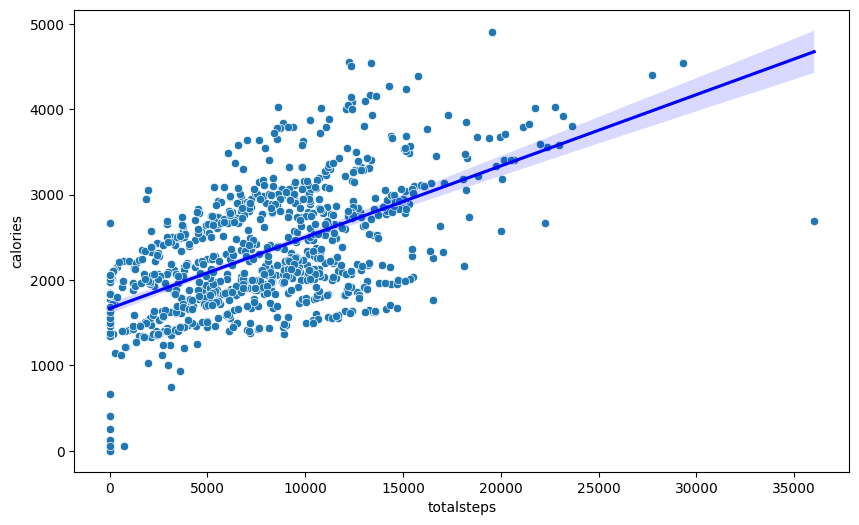

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity, x='totalsteps', y='calories')
sns.regplot(data=daily_activity, x='totalsteps', y='calories', scatter=False, color='blue')

It can be seen that there is positive correlation between the step taken and how much calories burned. As the more steps is taken, the more calories burnt. Now that I know that information, I wonder on which days of the week Bellabeat users are more active.

In [65]:
merged_daily = pd.merge(daily_activity, daily_sleep, on=['id', 'date'], how='outer')
print("Column names:", merged_daily.columns)

Column names: Index(['id', 'date', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed'],
      dtype='object')


In [66]:
# Calculate the weekday from the 'date' column
merged_daily['weekday'] = merged_daily['date'].dt.day_name()

# Define the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert the 'weekday' column to ordered categorical
merged_daily['weekday'] = pd.Categorical(merged_daily['weekday'], categories=weekday_order, ordered=True)

In [67]:
weekday_steps = merged_daily.groupby('weekday', as_index=False)['totalsteps'].mean().rename(columns={'totalsteps': 'DailySteps'})
print(weekday_steps)

     weekday   DailySteps
0     Monday  7780.866667
1    Tuesday  8125.006579
2  Wednesday  7559.373333
3   Thursday  7405.836735
4     Friday  7448.230159
5   Saturday  8152.975806
6     Sunday  6933.231405


/tmp/ipykernel_18/3455056852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_steps = merged_daily.groupby('weekday', as_index=False)['totalsteps'].mean().rename(columns={'totalsteps': 'DailySteps'})


Now I got that Saturday is the day where the user take the most steps. Let's visualize it to gain a better understanding.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


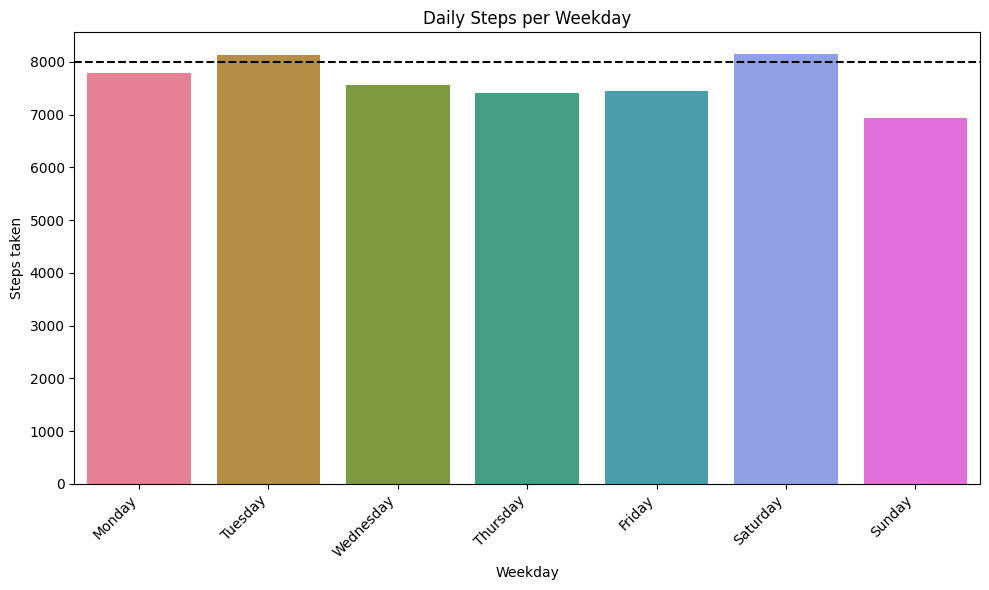

In [68]:
palette = sns.color_palette("husl", len(weekday_order))

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_steps, x='weekday', y='DailySteps', palette=palette)

# Add a horizontal line. As stated before, I choose 8000 as the recommended step that
# User need to taken in a day.
plt.axhline(y=8000, color='black', linestyle='--')

# Add titles and labels
plt.title("Daily Steps per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Steps taken")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Next, let's see in what day user sleep the most within a week.

In [69]:
daily_sleep['weekday'] = daily_sleep['date'].dt.day_name()

In [70]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sleep['weekday'] = pd.Categorical(daily_sleep['weekday'], categories=weekday_order, ordered=True)

In [71]:
weekday_sleep = daily_sleep.groupby('weekday', as_index=False)['totalminutesasleep'].mean().rename(columns={'totalminutesasleep': 'DailySleep'})

print(weekday_sleep)

     weekday  DailySleep
0     Monday  419.500000
1    Tuesday  404.538462
2  Wednesday  434.681818
3   Thursday  401.296875
4     Friday  405.421053
5   Saturday  419.070175
6     Sunday  452.745455


/tmp/ipykernel_18/3800781545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sleep = daily_sleep.groupby('weekday', as_index=False)['totalminutesasleep'].mean().rename(columns={'totalminutesasleep': 'DailySleep'})


/tmp/ipykernel_18/3228812263.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sleep = daily_sleep.groupby('weekday', as_index=False)['totalminutesasleep'].mean().rename(columns={'totalminutesasleep': 'DailySleep'})
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


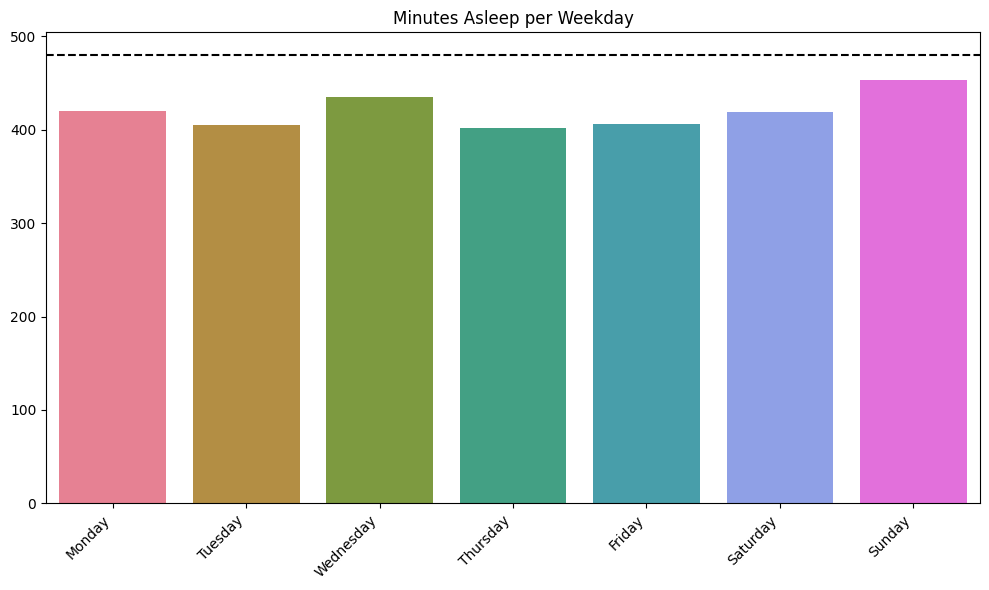

In [72]:
daily_sleep['weekday'] = daily_sleep['date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sleep['weekday'] = pd.Categorical(daily_sleep['weekday'], categories=weekday_order, ordered=True)

weekday_sleep = daily_sleep.groupby('weekday', as_index=False)['totalminutesasleep'].mean().rename(columns={'totalminutesasleep': 'DailySleep'})

palette = sns.color_palette("husl", len(weekday_order))  # Choose any palette

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sleep, x='weekday', y='DailySleep', palette=palette)

plt.axhline(y=480, color='black', linestyle='--')

plt.title("Minutes Asleep per Weekday")
plt.xlabel("")
plt.ylabel("")

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

It can be seen that Bellabeat users sleep the longest on Sundays. While Thursday is the day when they sleep the least

**Discoveries**

* The user took the recommended 7000 steps per day of the week. With the most steps taken on Saturday

* Users are not getting the recommended 8 hours of sleep a day. This can be bad for health  

**Hourly visualization**

The next thing I wanted to see and visualize was the hourly intensity & hourly steps the user took throughout the day.

**Hourly intensities throughout the day**


In [73]:
hourly_intensities.describe()

,id,datetime,totalintensity,averageintensity
count,2.209900e+04,22099,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,12.035341,0.200589
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,0.000000
50%,4.445115e+09,2016-04-26 06:00:00,3.000000,0.050000
75%,6.962181e+09,2016-05-03 19:00:00,16.000000,0.266667
max,8.877689e+09,2016-05-12 15:00:00,180.000000,3.000000
std,2.422500e+09,NaN,21.133110,0.352219


In [74]:
# Convert the 'datetime' column to string format
hourly_intensities['datetime'] = hourly_intensities['datetime'].astype(str)

# Split the 'datetime' column into 'date' and 'time' columns
hourly_intensities[['date', 'time']] = hourly_intensities['datetime'].str.split(' ', expand=True)

In [75]:
# Verify the DataFrame structure after separation
print(hourly_intensities.head())

           id             datetime  totalintensity  averageintensity  \
0  1503960366  2016-04-12 00:00:00              20          0.333333   
1  1503960366  2016-04-12 01:00:00               8          0.133333   
2  1503960366  2016-04-12 02:00:00               7          0.116667   
3  1503960366  2016-04-12 03:00:00               0          0.000000   
4  1503960366  2016-04-12 04:00:00               0          0.000000   

         date      time  
0  2016-04-12  00:00:00  
1  2016-04-12  01:00:00  
2  2016-04-12  02:00:00  
3  2016-04-12  03:00:00  
4  2016-04-12  04:00:00  


In [76]:
# Group by time and calculate mean of totalintensity
hourly_intensities_grouped = hourly_intensities.dropna().groupby('time')['totalintensity'].mean().reset_index()

In [77]:
hourly_intensities_grouped = hourly_intensities.dropna().groupby('time')['totalintensity'].mean().reset_index()

In [78]:
hourly_intensities_grouped.rename(columns={'totalintensity': 'mean_total_int'}, inplace=True)

In [79]:
print("After grouping by time and renaming the column:")
print(hourly_intensities_grouped)

After grouping by time and renaming the column:
        time  mean_total_int
0   00:00:00        2.129550
1   01:00:00        1.419078
2   02:00:00        1.043944
3   03:00:00        0.443730
4   04:00:00        0.633047
5   05:00:00        4.950644
6   06:00:00        7.771214
7   07:00:00       10.733620
8   08:00:00       14.668099
9   09:00:00       15.387755
10  10:00:00       17.643703
11  11:00:00       16.921251
12  12:00:00       19.847072
13  13:00:00       18.775244
14  14:00:00       18.868621
15  15:00:00       15.584699
16  16:00:00       17.716648
17  17:00:00       21.655629
18  18:00:00       21.921634
19  19:00:00       21.385210
20  20:00:00       14.339956
21  21:00:00       12.072928
22  22:00:00        9.063053
23  23:00:00        4.996678


Now let's make the visualization to see the correlation

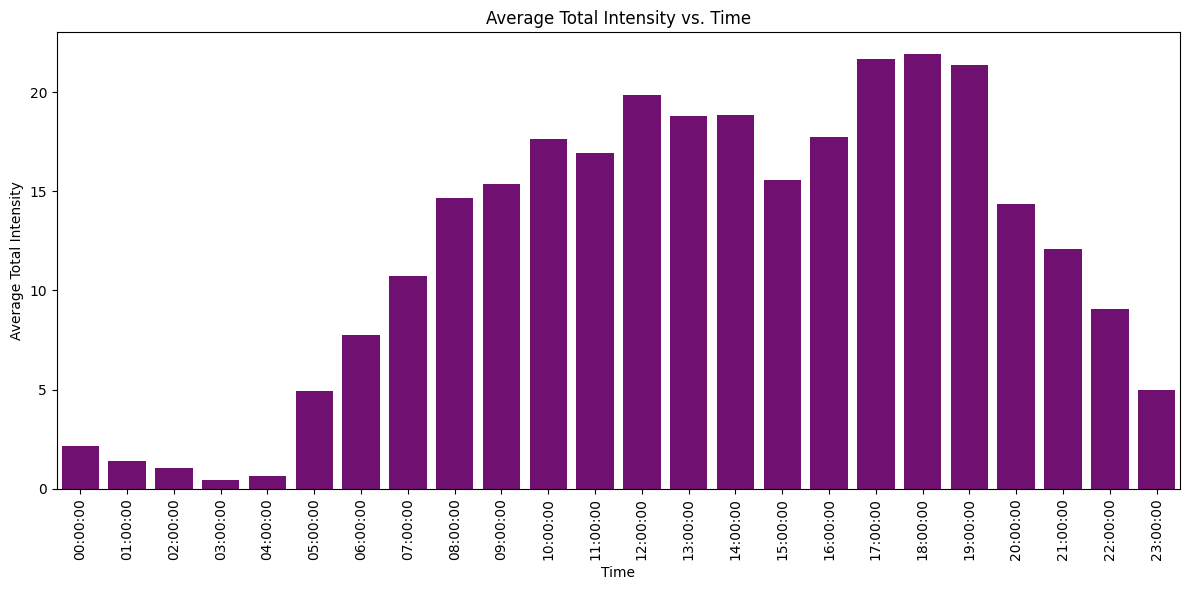

In [80]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=hourly_intensities_grouped, x='time', y='mean_total_int', color='purple')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title("Average Total Intensity vs. Time")
plt.xlabel("Time")
plt.ylabel("Average Total Intensity")

# Display the plot
plt.tight_layout()
plt.show()

**Discoveries after analyzing the intensities (hour)**
* From the graph, it can be seen that the user more active starting from 5 A.M - 10 P.M
* The highest activity occurs at 5pm - 7pm. 

**Hourly steps throughout the day**

Same as before, seperate the datetime column into date and time column

In [81]:
# Ensure the DateTime column is in string format
hourly_steps['datetime'] = hourly_steps['datetime'].astype(str)

# Separate DateTime into date and time
hourly_steps[['date', 'time']] = hourly_steps['datetime'].str.split(' ', expand=True)

# Convert date column to datetime format
hourly_steps['date'] = pd.to_datetime(hourly_steps['date'], format='%Y-%m-%d')

print(hourly_steps.head())

           id             datetime  steptotal       date      time
0  1503960366  2016-04-12 00:00:00        373 2016-04-12  00:00:00
1  1503960366  2016-04-12 01:00:00        160 2016-04-12  01:00:00
2  1503960366  2016-04-12 02:00:00        151 2016-04-12  02:00:00
3  1503960366  2016-04-12 03:00:00          0 2016-04-12  03:00:00
4  1503960366  2016-04-12 04:00:00          0 2016-04-12  04:00:00


visualization of the hourly steps throughout the day

/tmp/ipykernel_18/1393875932.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  bar_plot.figure.colorbar(sm)


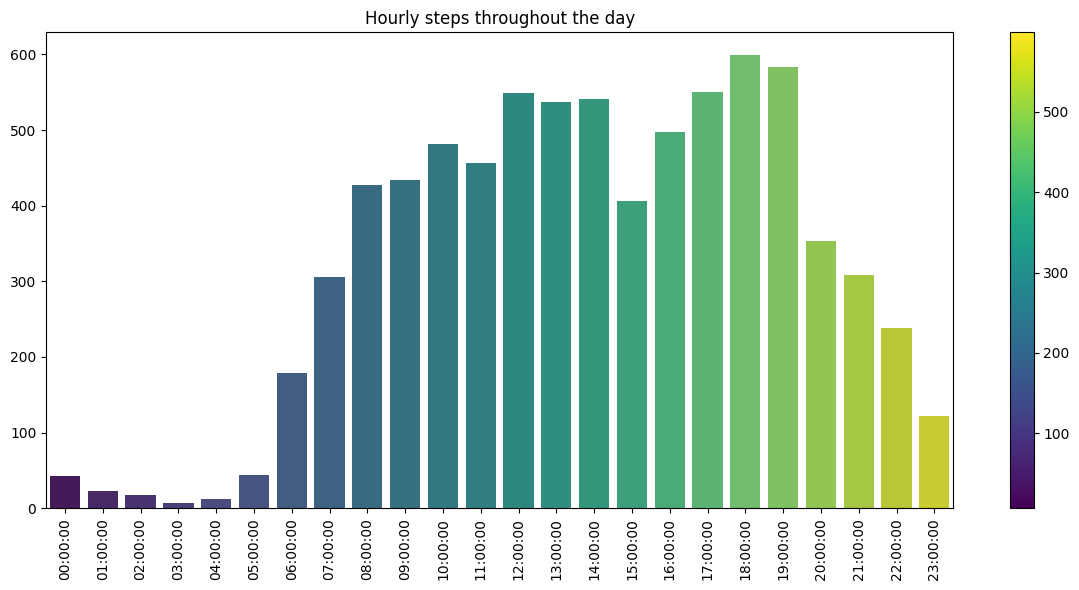

In [82]:
# Group by time and calculate the average steps
hourly_steps_grouped = hourly_steps.groupby('time')['steptotal'].mean().reset_index()
hourly_steps_grouped.rename(columns={'steptotal': 'average_steps'}, inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=hourly_steps_grouped, x='time', y='average_steps', palette="viridis")
plt.title("Hourly steps throughout the day")
plt.xlabel("")
plt.ylabel("")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add color gradient
norm = plt.Normalize(hourly_steps_grouped['average_steps'].min(), hourly_steps_grouped['average_steps'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  
bar_plot.figure.colorbar(sm)

plt.tight_layout()
plt.show()

**Discoveries**
* Users are active from 6 am to 10 pm.
* With the graph, it can also be seen that the most steps occur at 12pm to 2pm (Time for lunch) and also 6pm to 7pm (Time to go home from work). From this I conclude that the users of Bellabeat products are mostly career women who work.

****Percentage of Activity in Minutes ****

The percentage of time when people being active

In [83]:
daily_activity.head()

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


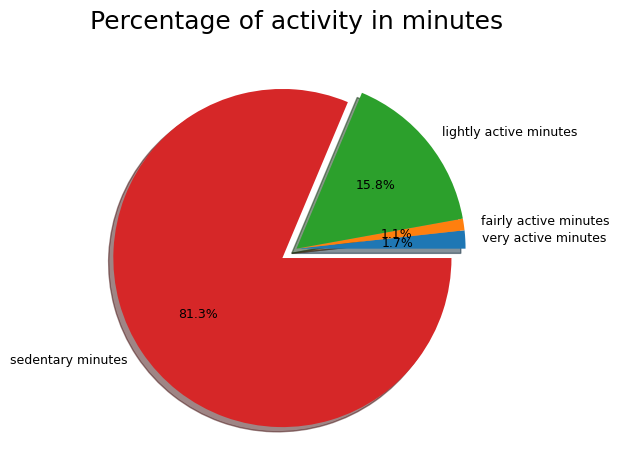

In [84]:
very_active_mins = daily_activity['veryactiveminutes'].sum() 
fairly_active_mins = daily_activity['fairlyactiveminutes'].sum()
lightly_active_mins = daily_activity['lightlyactiveminutes'].sum()
sedentary_mins = daily_activity['sedentaryminutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

**Discoveries**
* The pie chart show that more than 80% user are in sedentary state for most of the time. 
* Only 1.7% is very active and doing exercise

**Sixth Phase: Act**

After analyzing FitBit Fitness Tracker data, I found some insights that can help Bellabeat's marketing strategy.

My analysis included the average number of steps, hours of sleep and calories burned. In addition, I also analyzed which days Bellabeat product users were active. 

Disclaimer, since not all datasets were used and since the target audience of Bellabeat itself is for women, bias may occur and please understand.

**Recommendation**
* From the analysis conducted, it is known that the average steps taken by users still do not meet the recommendation of 8000 rare steps. According to research conducted by the University of Granada, taking 8000 steps can reduce the occurrence of premature death. Therefore, here I suggest creating a feature in our product that will send a notification of how many steps the user has taken per day. This is to encourage them to meet the set target of 8000 steps.

* Regarding notifications, from the analysis we also found that users started to stop their activities from 9pm onwards. We can use this information to send notifications related to features or the latest health news that will be useful for women.

* My analysis revealed users get less sleep than recommended (8 hours). To address this, we can add a feature to the app allowing users to set a desired bedtime and receive a notification beforehand, as well as set a sleep alarm.

* From the analysis, I also got information about the relationship between calories and how many steps the user has taken. We can use this information to filter out users who need information to address their calories, whether it's food recommendations or exercise that they can do to replace the steps they didn't take.

* Finally, I suggest creating a reward system where users who successfully carry out the recommendations given will get something, whether it is a product discount and so on. 